#PHYTHON INTERMEDIATE ASSIGNMENT

##DATA INGESTION

### Import Libraries

In [ ]:
import pandas as pd
# menambahkan library pandas (untuk manipulasi data dalam bentuk DataFrame)

import numpy as np
# menambahkan library numpy (untuk operasi numerik dan array)

from datetime import datetime
# mengambil fungsi datetime (untuk bekerja dengan tanggal & waktu)

import seaborn as sns
# menambahkan library seaborn (untuk visualisasi data statistik)

import matplotlib.pyplot as plt
# menambahkan modul pyplot (untuk membuat grafik)

import matplotlib.image as mpimg
# menambahkan modul image (untuk membaca/menampilkan gambar)

import matplotlib.cm as cm
# menambahkan colormap module (untuk skema warna pada visualisasi)

from yellowbrick.cluster import SilhouetteVisualizer
# menambahkan alat visualisasi siluet untuk analisis k-means clustering

from sklearn.cluster import KMeans
# menambahkan algoritma K-Means (untuk clustering/segmentasi data)

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
# menambahkan berbagai scaler dan transformer untuk normalisasi/transformasi data

from sklearn import metrics
# menambahkan modul evaluasi model (akurasi, F1, silhouette, dll)

from sklearn import cluster
# menambahkan modul clustering lain (DBSCAN, Agglomerative, MeanShift)

from sklearn.metrics import silhouette_samples, silhouette_score
# menambahkan fungsi perhitungan silhouette untuk mengevaluasi kualitas clustering

from sklearn.datasets import make_blobs
# menambahkan fungsi untuk membuat data dummy/ synthetic cluster (Gaussian blobs)

### Card dataset

In [ ]:
# Import dataset from spreadsheet
sheet_url ='https://docs.google.com/spreadsheets/d/1b4UKldpqgco09NIbvQ6s31YMytY6ESthLM4IJfE9QpE/edit?gid=1545334173#gid=1545334173'
sheet_url_replace = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=')

# Read from the new link
df_card_og = pd.read_csv(sheet_url_replace)
# Show only first 5 rows
df_card_og.head()

,id,client_id,card_brand,card_number,expires,cvv,credit_limit,acct_open_date,year_pin_last_changed,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
0,0,1362,Amex,3.933141e+14,04/2030,866,Rp53.189.000,01/1996,2019,17,181.0,Rp177.057.300,NaN,NaN
1,1,550,Mastercard,5.278232e+15,06/2030,396,Rp18.200.000,01/1999,2018,27,148.0,Rp135.687.100,NaN,NaN
2,2,556,Mastercard,5.889826e+15,09/2027,422,Rp31.298.000,01/2000,2016,20,415.0,Rp186.723.300,NaN,NaN
3,3,1937,Visa,4.289889e+15,04/2026,736,Rp25.732.000,01/2000,2020,7,148.0,Rp207.881.500,NaN,NaN
4,4,1981,Mastercard,5.433367e+15,03/2030,530,Rp30.500.000,01/2002,2012,14,48.0,Rp28.007.500,NaN,NaN


### User Dataset

In [ ]:
# Import dataset from spreadsheet
sheet_url ='https://docs.google.com/spreadsheets/d/15Zu0RkZHrDPo2lgppBroZijIM9cazyfkcmUJPAVl-Ok/edit?gid=1760178867#gid=1760178867'
sheet_url_replace = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=')

# Read from the new link
df_user_og = pd.read_csv(sheet_url_replace)

# Show only first 5 rows
df_user_og.head()


,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score
0,825,66,1972-11-25,Female,Rp45.937.000,Rp93.663.000,Rp38.138.095,787
1,1746,68,1972-12-16,Female,Rp59.451.000,Rp121.212.000,Rp57.186.095,701
2,1718,67,1944-11-04,Female,Rp35.586.000,Rp52.535.000,Rp58.666,698
3,708,63,1963-01-12,Female,Rp255.975.000,Rp392.132.000,Rp60.467.238,722
4,1164,70,1982-09-21,Male,Rp84.407.000,Rp172.099.000,Rp54.946.285,675


Data Dictionary Card



* **id** = Unique identifier for each credit card record

* **client_id** = Unique identifier that links this card to the user (found in USER DATA)

* **card_brand** = The brand of the card (i.e, Visa, Mastercard, Amex, JCB)

* **card_number** = The actual credit card number

* **expires** = Credit card expired date. After expiration date, the card cannot be used unless it is renewed

* **cvv** = Card Verification Value, which a three or four-digit security code printed on card to verify the legitimate cardholder during online or phone transactions

* **credit_limit** = The maximum amount of money you can borrow with this credit card

* **acct_open_date** = The account opening date

* **year_pin_last_changed** = The year of when the PIN was last changed

* **days_since_last_trx** = How many days ago the last transaction was made using this card

* **count_nonfraud_trx_L6M** = Number of transactions in the last 6 months that were not fraud

* **amt_nonfraud_trx_L6M** = The total amount of money spent in non-fraud transactions in the last 6 months

* **count_fraud_trx_L6M** = Number of transactions in the last 6 months that were fraud

* **amt_fraud_trx_L6M** = The total amount of money spent in fraud transactions in the last 6 months












```


Data Dictionary User

*   **id** = Unique identifier for each user (client)

*   **retirement_age** = The age at which the user plans to retire. Might help to understand their financial planning

*   **birthdate** = The user's date of birth. Useful for calculating age

*   **gender** = Gender of the user (Male / Female)

*   **per_capita_income** = Average income per person in the user's household

*   **yearly_income** = Total income earned by the user in a year

*   **total_debt** = Total debt the user currently owes

*   **credit_score** = A score that rates how trustworthy the user is for loans or credit (higher is better)



## MILESTONE 1- DATA CLEANING

Steps to do :

*   Unique Values (Remove irrelevant values)
*   Treating missing values (state the reasoning)
*   Outliers (in credit_limit, yearly_income, total_debt, and transaction.amount using IQR)
* Check Duplicates, retain only the first record
* Check data & convert data types
* Check typos
* Check time series data
*  Merge the dataset



### Card

In [ ]:
# Membuat copy file supaya kalo ada kesalahan nggak kerja 2x
# Create a copy of original data

df_card_dc = df_card_og.copy()

In [ ]:
# Showing 5 first data
df_card_dc.head()

,id,client_id,card_brand,card_number,expires,cvv,credit_limit,acct_open_date,year_pin_last_changed,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
0,0,1362,Amex,3.933141e+14,04/2030,866,Rp53.189.000,01/1996,2019,17,181.0,Rp177.057.300,NaN,NaN
1,1,550,Mastercard,5.278232e+15,06/2030,396,Rp18.200.000,01/1999,2018,27,148.0,Rp135.687.100,NaN,NaN
2,2,556,Mastercard,5.889826e+15,09/2027,422,Rp31.298.000,01/2000,2016,20,415.0,Rp186.723.300,NaN,NaN
3,3,1937,Visa,4.289889e+15,04/2026,736,Rp25.732.000,01/2000,2020,7,148.0,Rp207.881.500,NaN,NaN
4,4,1981,Mastercard,5.433367e+15,03/2030,530,Rp30.500.000,01/2002,2012,14,48.0,Rp28.007.500,NaN,NaN


#### Check Data Type

In [ ]:
# Check table info
df_card_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5599 non-null   int64  
 1   client_id               5599 non-null   int64  
 2   card_brand              5599 non-null   object 
 3   card_number             5599 non-null   float64
 4   expires                 5599 non-null   object 
 5   cvv                     5599 non-null   int64  
 6   credit_limit            5587 non-null   object 
 7   acct_open_date          5599 non-null   object 
 8   year_pin_last_changed   5599 non-null   int64  
 9   days_since_last_trx     5599 non-null   int64  
 10  count_nonfraud_trx_L6M  3707 non-null   float64
 11  amt_nonfraud_trx_L6M    3707 non-null   object 
 12  count_fraud_trx_L6M     547 non-null    float64
 13  amt_fraud_trx_L6M       547 non-null    object 
dtypes: float64(3), int64(5), object(6)
memor

Data Type Conversion Rationale (Card Dataset)

1. id, client_id, and card_brand are converted to string datatypes, as these fields serve as identifiers and categorical attributes rather than numerical values, and are not intended for mathematical operations.

2. card_number, count_nonfraud_trx_L6M, and count_fraud_trx_L6M are converted to integer (INT) datatypes to accurately represent discrete numeric values and ensure proper aggregation and counting during analysis.

3. expires and acct_open_date are converted to datetime datatypes to enable time-based analysis, such as identifying expired cards and calculating account tenure.

4. credit_limit, amt_nonfraud_trx_L6M, and amt_fraud_trx_L6M are converted to float datatypes to support numerical calculations involving monetary values after removing non-numeric characters.



In [ ]:
# Convert ID & categorical columns to string
df_card_dc['id'] = df_card_dc['id'].astype('string')
df_card_dc['client_id'] = df_card_dc['client_id'].astype('string')
df_card_dc['card_brand'] = df_card_dc['card_brand'].astype('string')

In [ ]:
# Convert card_number to integer
df_card_dc['card_number'] = df_card_dc['card_number'].astype('Int64')


In [ ]:
# Convert transaction count columns to integer
df_card_dc['count_nonfraud_trx_L6M'] = df_card_dc['count_nonfraud_trx_L6M'].fillna(0).astype('Int64')
df_card_dc['count_fraud_trx_L6M'] = df_card_dc['count_fraud_trx_L6M'].fillna(0).astype('Int64')


In [ ]:
#convert date to column to datetime
df_card_dc = df_card_dc[pd.to_datetime(df_card_dc['expires']) >= '2025-05-31']
df_card_dc['acct_open_date'] = pd.to_datetime(df_card_dc['acct_open_date'])

/tmp/ipython-input-514566443.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_card_dc = df_card_dc[pd.to_datetime(df_card_dc['expires']) >= '2025-05-31']
/tmp/ipython-input-514566443.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_card_dc['acct_open_date'] = pd.to_datetime(df_card_dc['acct_open_date'])


In [ ]:
# List of monetary columns
money_cols = ['credit_limit', 'amt_nonfraud_trx_L6M', 'amt_fraud_trx_L6M']

for col in money_cols:
    df_card_dc[col] = (
        df_card_dc[col]
        .astype(str)
        .str.replace('Rp', '', regex=False)   # hapus Rp
        .str.replace('.', '', regex=False)    # hapus titik ribuan
        .str.replace(',', '', regex=False)    # jaga-jaga kalau ada koma
        .str.strip()
        .replace('', np.nan)
        .astype(float)
    )


In [ ]:
# Show data summary
df_card_dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5559 entries, 0 to 5598
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5559 non-null   string        
 1   client_id               5559 non-null   string        
 2   card_brand              5559 non-null   string        
 3   card_number             5559 non-null   Int64         
 4   expires                 5559 non-null   object        
 5   cvv                     5559 non-null   int64         
 6   credit_limit            5559 non-null   float64       
 7   acct_open_date          5559 non-null   datetime64[ns]
 8   year_pin_last_changed   5559 non-null   int64         
 9   days_since_last_trx     5559 non-null   int64         
 10  count_nonfraud_trx_L6M  5559 non-null   Int64         
 11  amt_nonfraud_trx_L6M    3703 non-null   float64       
 12  count_fraud_trx_L6M     5559 non-null   Int64        

#### Check Value and Typo

In [ ]:
# Menampilkan daftar kolom yang bertipe string
df_card_dc.select_dtypes(include='string').columns


Index(['id', 'client_id', 'card_brand'], dtype='object')

In [ ]:
# Mencari TYPO dan inkonsistensi kategori di SEMUA kolom teks,
for col in df_card_dc.select_dtypes(include=['object', 'string']).columns:
    print(f"\n=== {col} ===")
    print(df_card_dc[col].value_counts())



=== id ===
id
5515    2
4350    2
1781    2
2893    2
209     2
       ..
6132    1
6133    1
6122    1
6135    1
6124    1
Name: count, Length: 5528, dtype: Int64

=== client_id ===
client_id
797     9
1301    9
921     9
665     8
1031    8
       ..
504     1
1554    1
1924    1
627     1
705     1
Name: count, Length: 1938, dtype: Int64

=== card_brand ===
card_brand
Mastercard    2813
Visa          2147
Amex           394
JCB            202
Jcb              3
Name: count, dtype: Int64

=== expires ===
expires
02/2026    350
01/2026    127
03/2030    106
11/2026    105
10/2030    102
          ... 
08/2025      9
02/2031      9
11/2025      7
10/2025      7
09/2025      6
Name: count, Length: 79, dtype: int64


Issues Identified

1. card_brand shows inconsistent capitalization (e.g., “JCB” vs “Jcb”), which represents the same category.

2. Date-related columns (expires, acct_open_date) appear in string format with multiple representations (e.g., 02/2026, 11/2026), indicating formatting inconsistency.

3. Monetary columns (credit_limit, amt_nonfraud_trx_L6M, amt_fraud_trx_L6M) contain currency symbols and thousand separators (e.g., “Rp”, dots), making them non-numeric.

4. Zero-value entries are present in credit_limit (e.g., Rp0), which are not meaningful for active card analysis.

In [ ]:
df_card_dc['card_brand'].unique()


<StringArray>
['Amex', 'Mastercard', 'Visa', 'JCB', 'Jcb']
Length: 5, dtype: string

In [ ]:
# Standardize card_brand capitalization
df_card_dc['card_brand'] = df_card_dc['card_brand'].str.upper()


In [ ]:
df_card_dc['card_brand'].value_counts()


,count
card_brand,
MASTERCARD,2813
VISA,2147
AMEX,394
JCB,205


There are no missing values ​​in the card_brand column.

#### Treat Missing Value and Duplicate

In [ ]:
#Check Missing Value
df_card_dc.isna().sum()


,0
id,0
client_id,0
card_brand,0
card_number,0
expires,0
cvv,0
credit_limit,0
acct_open_date,0
year_pin_last_changed,0
days_since_last_trx,0


Five columns were identified with missing values and required data cleaning: **credit_limit**, **count_nonfraud_trx_L6M**, **amt_nonfraud_trx_L6M**, **count_fraud_trx_L6M** and **amt_fraud_trx_L6M**.

In [ ]:
# Deleting rows  whose credit_limit value is empty (NaN)
df_card_dc = df_card_dc.dropna(subset=['credit_limit'])

# Fill missing transaction values with 0
transaction_cols = ['amt_nonfraud_trx_L6M', 'amt_fraud_trx_L6M']

df_card_dc[transaction_cols] = df_card_dc[transaction_cols].fillna(0)


**Insight**

1. Rows with missing values in the credit_limit column were removed, as credit limit is a critical financial attribute and cannot be logically imputed.

2. Missing values in transaction-related columns (amt_fraud_trx_L6M, count_fraud_trx_L6M, count_nonfraud_trx_L6M, and amt_nonfraud_trx_L6M) were filled with zero, representing the absence of transaction activity rather than data quality issues.


In [ ]:
#Check Missing Value
df_card_dc.isna().sum()


,0
id,0
client_id,0
card_brand,0
card_number,0
expires,0
cvv,0
credit_limit,0
acct_open_date,0
year_pin_last_changed,0
days_since_last_trx,0


**After cleaning, no missing values remain in the card dataset**

#### Check Duplicates

In [ ]:
# Check Duplicates
df_card_dc.duplicated().sum()

np.int64(31)

In [ ]:
# Check duplicate records based on card_number and display all rows involved,
# sorted by card_number for easier visual inspection

df_card_dc[df_card_dc.duplicated(subset=['id'], keep=False)].sort_values('id')


,id,client_id,card_brand,card_number,expires,cvv,credit_limit,acct_open_date,year_pin_last_changed,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
1040,1161,1891,VISA,4268017872699469,08/2031,476,23891000.0,2013-02-01,2020,12,96,43768500.0,0,0.0
5597,1161,1891,VISA,4268017872699469,08/2031,476,23891000.0,2013-02-01,2020,12,96,43768500.0,0,0.0
5584,1781,1372,VISA,4806267788873524,08/2026,289,9257000.0,2020-08-01,2025,604,0,0.0,0,0.0
1604,1781,1372,VISA,4806267788873524,08/2026,289,9257000.0,2020-08-01,2025,604,0,0.0,0,0.0
5580,1860,975,VISA,4039295566770817,05/2027,214,11336000.0,2021-05-01,2025,604,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5515,1422,VISA,4103248264872952,07/2031,23,10184000.0,2012-11-01,2018,3,99,41753200.0,0,0.0
5538,6115,921,VISA,4816027381867141,11/2029,163,35623000.0,2020-12-01,2020,15,39,53889900.0,0,0.0
5598,6115,921,VISA,4816027381867141,11/2029,163,35623000.0,2020-12-01,2020,15,39,53889900.0,0,0.0
667,749,54,VISA,4557061225558443,05/2029,780,22300000.0,2023-05-01,2025,604,0,0.0,0,0.0


In [ ]:
#Delete Duplicates in column card_number
df_card_dc = df_card_dc.drop_duplicates(subset=['id'])


In [ ]:
# Check Duplicates in column card_number
df_card_dc.duplicated(subset=['id']).sum()


np.int64(0)

In [ ]:
# Check Duplicates
df_card_dc.duplicated().sum()

np.int64(0)

In [ ]:
df_card_dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5528 entries, 0 to 5567
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5528 non-null   string        
 1   client_id               5528 non-null   string        
 2   card_brand              5528 non-null   string        
 3   card_number             5528 non-null   Int64         
 4   expires                 5528 non-null   object        
 5   cvv                     5528 non-null   int64         
 6   credit_limit            5528 non-null   float64       
 7   acct_open_date          5528 non-null   datetime64[ns]
 8   year_pin_last_changed   5528 non-null   int64         
 9   days_since_last_trx     5528 non-null   int64         
 10  count_nonfraud_trx_L6M  5528 non-null   Int64         
 11  amt_nonfraud_trx_L6M    5528 non-null   float64       
 12  count_fraud_trx_L6M     5528 non-null   Int64        

#### Card Cleaning Data

In [ ]:
df_card_dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5528 entries, 0 to 5567
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5528 non-null   string        
 1   client_id               5528 non-null   string        
 2   card_brand              5528 non-null   string        
 3   card_number             5528 non-null   Int64         
 4   expires                 5528 non-null   object        
 5   cvv                     5528 non-null   int64         
 6   credit_limit            5528 non-null   float64       
 7   acct_open_date          5528 non-null   datetime64[ns]
 8   year_pin_last_changed   5528 non-null   int64         
 9   days_since_last_trx     5528 non-null   int64         
 10  count_nonfraud_trx_L6M  5528 non-null   Int64         
 11  amt_nonfraud_trx_L6M    5528 non-null   float64       
 12  count_fraud_trx_L6M     5528 non-null   Int64        

In [ ]:
# filter invalid card ( expired & credit limit = 0)



# 2. Tentukan cutoff date
cutoff_date = pd.Timestamp('2025-05-31')

# 3. Hapus kartu yang sudah expired
df_card_dc['expires'] = pd.to_datetime(df_card_dc['expires'])



# 4. Hapus kartu dengan credit_limit = 0
df_card_dc = df_card_dc[df_card_dc['credit_limit'] > 0]

# 5. Validasi hasil
df_card_dc.shape


/tmp/ipython-input-3343389125.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_card_dc['expires'] = pd.to_datetime(df_card_dc['expires'])


(5528, 14)

In [ ]:
df_card_dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5528 entries, 0 to 5567
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5528 non-null   string        
 1   client_id               5528 non-null   string        
 2   card_brand              5528 non-null   string        
 3   card_number             5528 non-null   Int64         
 4   expires                 5528 non-null   datetime64[ns]
 5   cvv                     5528 non-null   int64         
 6   credit_limit            5528 non-null   float64       
 7   acct_open_date          5528 non-null   datetime64[ns]
 8   year_pin_last_changed   5528 non-null   int64         
 9   days_since_last_trx     5528 non-null   int64         
 10  count_nonfraud_trx_L6M  5528 non-null   Int64         
 11  amt_nonfraud_trx_L6M    5528 non-null   float64       
 12  count_fraud_trx_L6M     5528 non-null   Int64        

**Insight**

1. Cards that had expired before the analysis cutoff date (May 31, 2025) were removed from the dataset.

2. Cards with zero credit limits were excluded as they are not usable for transactions.

3. After filtering, the dataset contains 5,559 active and usable card records, ensuring data relevance for further analysis.

In [ ]:
#Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later

df_card = df_card_dc.copy()


### User

In [ ]:
# Membuat copy file supaya kalo ada kesalahan nggak kerja 2x
# Create a copy of original data

df_user_dc = df_user_og.copy()

#### Check Data Type

In [ ]:
# Check table info
df_user_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2000 non-null   int64 
 1   retirement_age     2000 non-null   int64 
 2   birthdate          2000 non-null   object
 3   gender             2000 non-null   object
 4   per_capita_income  2000 non-null   object
 5   yearly_income      2000 non-null   object
 6   total_debt         2000 non-null   object
 7   credit_score       2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


Data Type Conversion Rationale (user Dataset)

1. id and gender are converted to string datatypes, as these fields function as identifiers and categorical attributes rather than numerical values, and are not intended for mathematical operations.

2. birthdate is converted to a datetime datatype to enable time-based analysis, including accurate age calculation and cohort analysis.

3. per_capita_income, yearly_income, and total_debt are converted to float datatypes to support numerical computations involving monetary values, after removing non-numeric characters such as currency symbols and thousand separators.


#### Check Value and Typo

In [ ]:
# Check MISSING value Percolumn
df_user_dc.isnull().sum()


,0
id,0
retirement_age,0
birthdate,0
gender,0
per_capita_income,0
yearly_income,0
total_debt,0
credit_score,0


There are no missing values in the dataset.

In [ ]:
#Check TYPOs and category inconsistencies in ALL text fields,
for col in df_user_dc.select_dtypes(include=['object', 'string']).columns:
    print(f"\n=== {col} ===")
    print(df_user_dc[col].value_counts())


=== birthdate ===
birthdate
2008-01-14    3
2008-02-09    3
2008-02-18    3
1991-11-03    3
2005-11-14    3
             ..
1999-05-07    1
2002-05-05    1
1974-07-20    1
1991-01-06    1
1985-06-05    1
Name: count, Length: 1901, dtype: int64

=== gender ===
gender
Female    1016
Male       984
Name: count, dtype: int64

=== per_capita_income ===
per_capita_income
Rp0             15
Rp30.410.000     4
Rp63.331.000     3
Rp23.078.000     3
Rp24.720.000     3
                ..
Rp25.765.000     1
Rp52.190.000     1
Rp33.997.000     1
Rp86.725.000     1
Rp39.043.000     1
Name: count, Length: 1754, dtype: int64

=== yearly_income ===
yearly_income
Rp69.237.000     3
Rp51.041.000     2
Rp64.550.000     2
Rp79.988.000     2
Rp52.056.000     2
                ..
Rp106.410.000    1
Rp69.320.000     1
Rp176.818.000    1
Rp58.787.000     1
Rp42.383.000     1
Name: count, Length: 1948, dtype: int64

=== total_debt ===
total_debt
Rp0             102
Rp7.145.333       2
Rp15.369.714      2
Rp12.

No typographical errors or category inconsistencies are identified in the user dataset, and all categorical fields are consistently formatted.

The next step is to perform data type conversion.

In [ ]:
#Convert id and gender to string
df_user_dc['id'] = df_user_dc['id'].astype('string')
df_user_dc['gender'] = df_user_dc['gender'].astype('string')


In [ ]:
#Convert birthdate to datetime
df_user_dc['birthdate'] = pd.to_datetime(df_user_dc['birthdate'], errors='coerce')


In [ ]:
#Convert kolom numerik uang to float
money_cols = ['per_capita_income', 'yearly_income', 'total_debt']

for col in money_cols:
    df_user_dc[col] = (
        df_user_dc[col]
        .astype(str)
        .str.replace('Rp', '', regex=False)   # hapus Rp
        .str.replace('.', '', regex=False)    # hapus titik ribuan
        .str.replace(',', '', regex=False)    # jaga-jaga kalau ada koma
        .str.strip()
        .replace('', np.nan)
        .astype(float)
    )

In [ ]:
df_user_dc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   string        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   string        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), string(2)
memory usage: 125.1 KB


After the data type conversion process, the dataset has data types that are appropriately aligned with their analytical purposes.

#### Check Duplicates

In [ ]:
# Check Duplicates
df_user_dc.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset.

#### Feature Engineering: Age, Retirement Age, and Debt-to-Income (DTI)

In [ ]:
#Untuk setiap user, hitung umur dengan cara mengurangkan tanggal lahir dari tanggal acuan, ubah selisihnya menjadi jumlah hari, lalu bagi 365 dan bulatkan ke bawah

In [ ]:
# Define cutoff date
cutoff_date = pd.Timestamp('2025-05-31')

# Create age column
df_user_dc['age'] = (
    (cutoff_date - df_user_dc['birthdate']).dt.days // 365)


In [ ]:
# change age to integer
df_user_dc['age'] = df_user_dc['age'].astype('Int64')


In [ ]:
# Create Retired Flag
# 1= retired and 0= not yet retired

df_user_dc['retired_flag'] = np.where(df_user_dc['age'] >= df_user_dc['retirement_age'], 'retired', 'non retired')
df_user_dc.head()

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,non retired
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,non retired
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,retired
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,non retired
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,non retired


In [ ]:
#DTI = total_debt / yearly_income

df_user_dc['DTI'] = df_user_dc['total_debt'] / df_user_dc['yearly_income']

In [ ]:
df_user_dc['retired_flag'].value_counts()



,count
retired_flag,
non retired,1715
retired,285


In [ ]:
df_user_dc['retired_flag'].value_counts(normalize=True) * 100
(df_user_dc['retired_flag'].value_counts(normalize=True) * 100).round(1)


,proportion
retired_flag,
non retired,85.8
retired,14.2


**Insight**

The feature engineering results indicate that the majority of users are in their productive age group, with 85.8% not yet retired and only 14.2% classified as retired. The DTI values fall within a reasonable range, suggesting that most users maintain a relatively manageable debt burden compared to their annual income, making the dataset suitable for further risk analysis and segmentation.

#### User Cleaning Data

In [ ]:
df_user = df_user_dc.copy()

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   string        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   string        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
 8   age                2000 non-null   Int64         
 9   retired_flag       2000 non-null   object        
 10  DTI                2000 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(4), int64(2), object(1), string(2)
memory usage: 174.0+ KB


## Milestone 2 - EDA

### Question

1. Calculate the total net profit
2. Calculate the fraud rate of RevoBank
3. Difference in transaction behaviour per card brand
4. Compare the debt-to-income ratio retired vs non retired users
5. DTI by Credit Score Category
6. Relationship between User Age and Credit Limit



### Descriptive Statistic

### Answer

#### A. Calculate the total net profit

In [ ]:
# Define the MDR rate as 1.5% based on RevoBank's profit margin
mdr_rate = 0.015

#Total Fraud Amount
total_fraud = df_card['amt_fraud_trx_L6M'].sum()

#Total Sales Amount (Non-Fraud)
total_sales_amt = df_card['amt_nonfraud_trx_L6M'].sum()


# Net Profit = (Total Sales  * MDR) - Total Fraud Loss
mdr_income = total_sales_amt * mdr_rate
total_net_profit = mdr_income - total_fraud

print(f"Total MDR Income: {mdr_income:,.2f}")
print(f"Total Fraud Loss: {total_fraud:,.2f}")
print(f"Total Net Profit: {total_net_profit:,.2f}")

Total MDR Income: 6,837,952,299.00
Total Fraud Loss: 1,013,378,300.00
Total Net Profit: 5,824,573,999.00


####B. Fraud Rate

In [ ]:
# Total fraud & non-fraud amount
total_fraud = df_card['amt_fraud_trx_L6M'].sum()
total_nonfraud = df_card['amt_nonfraud_trx_L6M'].sum()

# Fraud rate
fraud_rate = total_fraud / (total_fraud + total_nonfraud)

# Print result
print(f"Fraud Rate (Last 6 Months): {fraud_rate:.2%}")


Fraud Rate (Last 6 Months): 0.22%


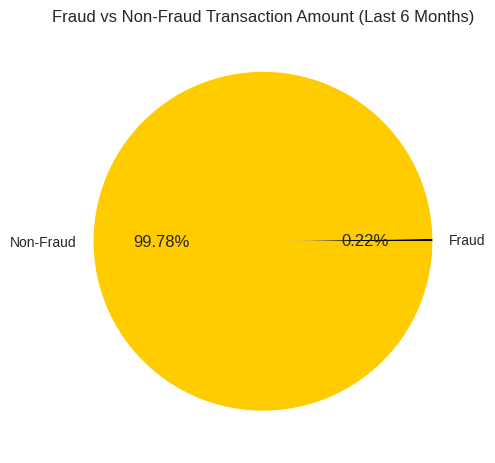

In [ ]:
plt.figure()
plt.pie(
    [total_fraud, total_nonfraud],
    labels=['Fraud', 'Non-Fraud'],
    colors= ['#000000', '#FFCC00'],
    autopct='%.2f%%'
)

plt.title('Fraud vs Non-Fraud Transaction Amount (Last 6 Months)')
plt.show()

####C. Transaction Behaviour per Card Brand

In [ ]:
# Total Transaction Count (Fraud + Non-Fraud)
df_card['total_trx_count_6M'] = (df_card['count_nonfraud_trx_L6M'] + df_card['count_fraud_trx_L6M'])

# Total Transaction Amount (Fraud + Non-Fraud)
df_card['total_trx_amount_6M'] = (df_card['amt_nonfraud_trx_L6M'] + df_card['amt_fraud_trx_L6M'])


In [ ]:
behaviour_by_brand = (df_card.groupby('card_brand').agg(avg_trx_count=('total_trx_count_6M', 'mean'),avg_trx_amount=('total_trx_amount_6M', 'mean'))
    .reset_index())

behaviour_by_brand




,card_brand,avg_trx_count,avg_trx_amount
0,AMEX,113.068528,9.906046e+07
1,JCB,84.531707,7.521162e+07
2,MASTERCARD,122.051902,8.078685e+07
3,VISA,116.172495,8.278603e+07


Mastercard exhibits the highest average transaction frequency (≈122 transactions over the last six months), followed by Visa (≈116) and Amex (≈113), while JCB shows the lowest usage level (≈85). Conversely, Amex records the highest average transaction amount (≈IDR 99 million), indicating a premium spending pattern, whereas Mastercard and Visa are characterized by higher transaction frequency with moderate average transaction values.

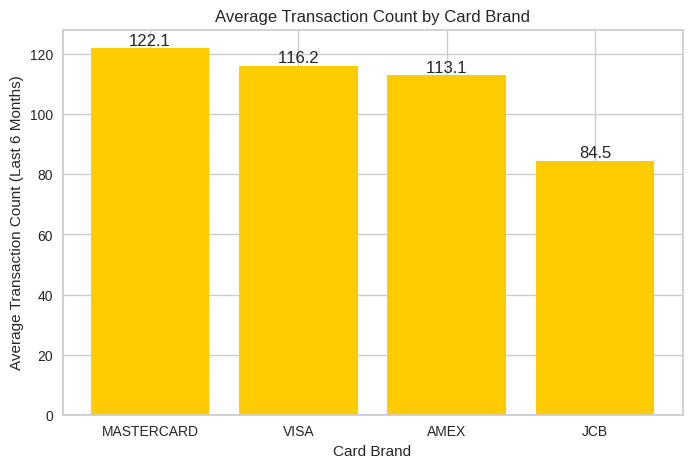

In [ ]:
K = behaviour_by_brand.sort_values('avg_trx_count', ascending=False)

plt.figure(figsize=(8,5))
bars = plt.bar(K['card_brand'], K['avg_trx_count'],
    color='#FFCC00')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.1f}",
        ha='center', va='bottom'
    )

plt.xlabel("Card Brand")
plt.ylabel("Average Transaction Count (Last 6 Months)")
plt.title("Average Transaction Count by Card Brand")
plt.show()


**INSIGHT**
Mastercard shows the highest average transaction frequency (≈122 transactions in the last 6 months), followed by Visa (≈116) and Amex (≈113), while JCB records the lowest activity (≈85), indicating that Mastercard and Visa users are more actively transacting compared to other card brands.

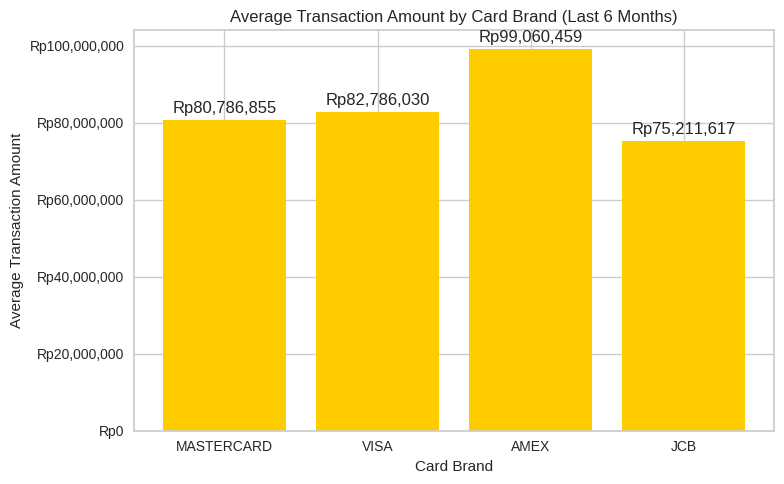

In [ ]:
import matplotlib.ticker as mtick

# Sort by average transaction amount
K = behaviour_by_brand.sort_values('avg_trx_count', ascending=False)



plt.figure(figsize=(8,5))
bars = plt.bar(K['card_brand'], K['avg_trx_amount'],
    color='#FFCC00')

plt.xlabel('Card Brand')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Card Brand (Last 6 Months)')

# Format Y-axis to IDR
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('Rp{x:,.0f}'))

# Add value labels
plt.bar_label(bars, padding=3, fmt='Rp{:,.0f}')

plt.tight_layout()
plt.show()


**INSIGHT:** Amex records the highest average transaction amount (≈Rp99.1 million) over the last six months, indicating premium spending behavior, while Visa (≈Rp82.8 million) and Mastercard (≈Rp80.8 million) show moderate average spending, and JCB has the lowest average transaction value (≈Rp75.2 million).

#### Merge Data

In [ ]:
df_user['id'] = df_user['id'].astype(str).str.strip()
df_card['client_id'] = df_card['client_id'].astype(str).str.strip()

# Drop rows with invalid join keys
df_user = df_user[df_user['id'].notna()]
df_card = df_card[df_card['client_id'].notna()]

# Aggregate card data to user level

card_agg = df_card.groupby('client_id', as_index=False).agg({
    'days_since_last_trx': 'min',
    'count_nonfraud_trx_L6M': 'sum',
    'amt_nonfraud_trx_L6M': 'sum',
    'count_fraud_trx_L6M': 'sum',
    'amt_fraud_trx_L6M': 'sum',
    'credit_limit': 'sum'
})

# Merge (INNER JOIN)

df_merged = pd.merge(
    df_user,
    card_agg,
    how='inner',
    left_on='id',
    right_on='client_id'
)

df_merged.head()

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI,client_id,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,credit_limit
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,non retired,0.407184,825,10,599,755489800.0,1,-7421400.0,164867000.0
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,non retired,0.471786,1746,24,189,388726600.0,0,0.0,102033000.0
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,retired,0.001117,1718,4,1322,705750600.0,0,0.0,209210000.0
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,non retired,0.154201,708,4,378,897483900.0,0,0.0,558975000.0
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,non retired,0.319271,1164,21,496,763527700.0,0,0.0,54758000.0


In [ ]:
#To summary the data cleaning

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1938 non-null   object        
 1   retirement_age          1938 non-null   int64         
 2   birthdate               1938 non-null   datetime64[ns]
 3   gender                  1938 non-null   string        
 4   per_capita_income       1938 non-null   float64       
 5   yearly_income           1938 non-null   float64       
 6   total_debt              1938 non-null   float64       
 7   credit_score            1938 non-null   int64         
 8   age                     1938 non-null   Int64         
 9   retired_flag            1938 non-null   object        
 10  DTI                     1938 non-null   float64       
 11  client_id               1938 non-null   object        
 12  days_since_last_trx     1938 non-null   int64   

<Axes: xlabel='yearly_income'>

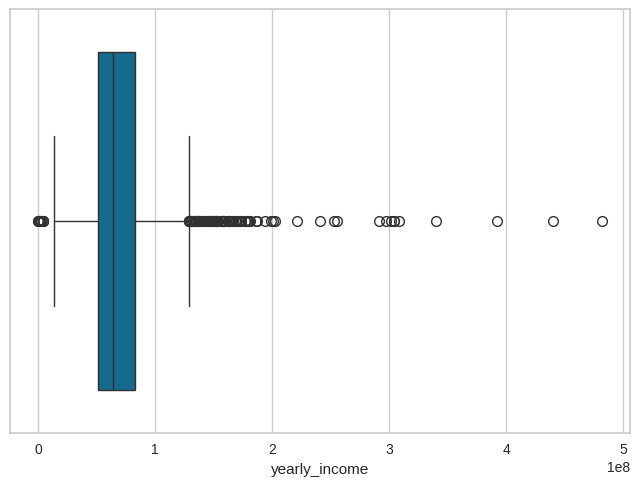

In [ ]:
#Cheking the data distribution of the df_merged data for yearly_income using seaborn

sns.boxplot(data = df_merged , x ="yearly_income")

**Insight:** There are no outliers on the lower bound of yearly_income; however, a substantial number of outliers are detected on the upper bound, indicating a right-skewed income distribution where a small proportion of individuals earn significantly higher incomes compared to the majority.

####D. Debt-to-Income (Retired vs Non-Retired)

In [ ]:
#Debt-to-Income Ratio
df_merged['debt_to_income'] = (df_merged['total_debt'] / df_merged['yearly_income'])


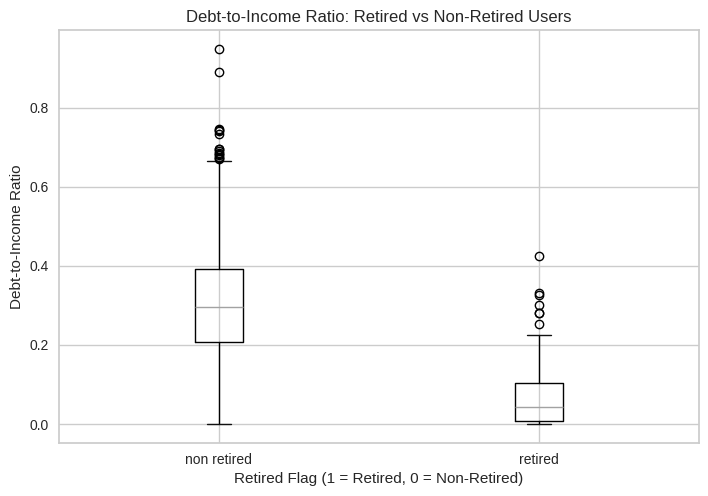

In [ ]:
df_merged.boxplot(column='debt_to_income', by='retired_flag')

plt.title('Debt-to-Income Ratio: Retired vs Non-Retired Users')
plt.suptitle('')
plt.xlabel('Retired Flag (1 = Retired, 0 = Non-Retired)')
plt.ylabel('Debt-to-Income Ratio')
plt.show()


Based on the debt-to-income distribution, non-retired users demonstrate higher leverage and greater financial risk compared to retired users.

####E. DTI by Credit Score Category

In [ ]:
#categorize credit score
bins = [300, 580, 670, 740, 800, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

df_merged['credit_score_category'] = pd.cut(df_merged['credit_score'], bins=bins, labels=labels, include_lowest=True)

#Calculate Average DTI per Credit Score
dti_summary = (df_merged.groupby('credit_score_category')['DTI'].mean().reset_index())

dti_summary

/tmp/ipython-input-1408368139.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_summary = (df_merged.groupby('credit_score_category')['DTI'].mean().reset_index())


,credit_score_category,DTI
0,Poor,0.302168
1,Fair,0.316926
2,Good,0.250791
3,Very Good,0.245558
4,Exceptional,0.241595


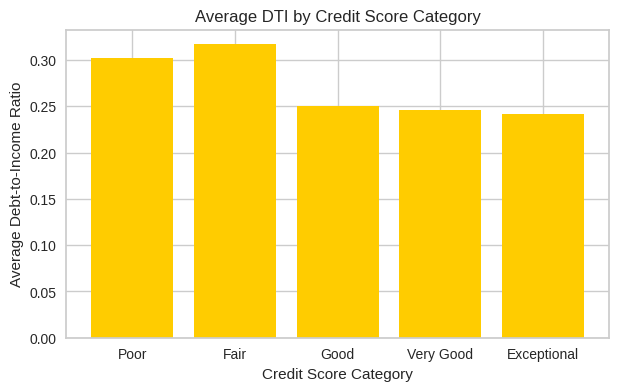

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(
    dti_summary['credit_score_category'],
    dti_summary['DTI'],
    color='#FFCC00'
)
plt.xlabel('Credit Score Category')
plt.ylabel('Average Debt-to-Income Ratio')
plt.title('Average DTI by Credit Score Category')
plt.show()


The analysis shows a clear inverse relationship between credit score category and average DTI, where higher credit scores are associated with lower debt-to-income ratios, indicating a lower financial risk profile.

####F. Relationship Between User Age and Credit Limit

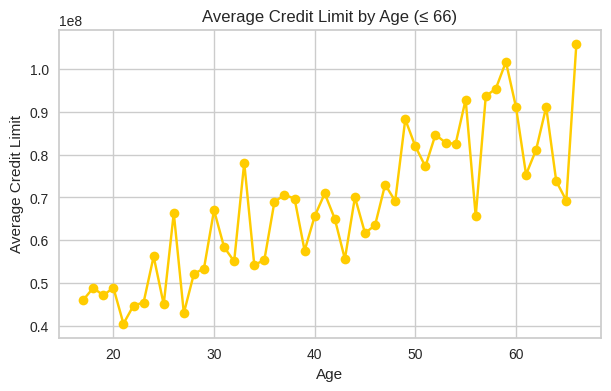

In [ ]:
# Filter age <= 66
df_merged = df_merged[df_merged['age'] <= 66]

# Aggregate credit limit by age
age_credit_summary = (
    df_merged.groupby('age')['credit_limit']
    .mean()
    .reset_index()
)

# Line chart
plt.figure(figsize=(7,4))
plt.plot(
    age_credit_summary['age'],
    age_credit_summary['credit_limit'],
    marker='o', color='#FFCC00'
)

plt.xlabel('Age')
plt.ylabel('Average Credit Limit')
plt.title('Average Credit Limit by Age (≤ 66)')
plt.show()


**Insight:** analysis shows a clear positive relationship between age and average credit limit up to age 66, where limits gradually increase from approximately IDR 45–60 million in the early 20s to around IDR 80–100 million among users in their 50s–60s, indicating higher credit capacity within productive age segments.

## Milestone 3

In [ ]:
df_segmentation = df_card.merge(df_user, left_on='client_id', right_on= 'id', how='inner')
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_x                    5528 non-null   string        
 1   client_id               5528 non-null   object        
 2   card_brand              5528 non-null   string        
 3   card_number             5528 non-null   Int64         
 4   expires                 5528 non-null   datetime64[ns]
 5   cvv                     5528 non-null   int64         
 6   credit_limit            5528 non-null   float64       
 7   acct_open_date          5528 non-null   datetime64[ns]
 8   year_pin_last_changed   5528 non-null   int64         
 9   days_since_last_trx     5528 non-null   int64         
 10  count_nonfraud_trx_L6M  5528 non-null   Int64         
 11  amt_nonfraud_trx_L6M    5528 non-null   float64       
 12  count_fraud_trx_L6M     5528 non-null   Int64   

### Checking Outlier

Outlier analysis is conducted to identify extreme values that may bias statistical results and business insights, ensuring that conclusions are representative of the overall population while preserving valid high-value observations.

In [ ]:
# #IQR
# Q1_inc = df_merged['yearly_income'].quantile(0.25)
# Q3_inc = df_merged['yearly_income'].quantile(0.75)
# IQR_inc = Q3_inc - Q1_inc
# inc_LB = Q1_inc - 1.5 * IQR_inc
# inc_UB = Q3_inc + 1.5 * IQR_inc

# print('Q1 : ',Q1_inc)
# print('Q3 : ',Q3_inc)
# print('IQR: ',IQR_inc)
# print('LB: ', inc_LB)
# print('UB: ', inc_UB)

In [ ]:
# # Removing/Excluding the outlier and assign it on new variable "df_clean" by using negate (~)

# df_clean= df_merged[~((df_merged["yearly_income"] < inc_LB) | (df_merged["yearly_income"] > inc_UB))]

# df_clean.shape

### Clustering

In [ ]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_x                    5528 non-null   string        
 1   client_id               5528 non-null   object        
 2   card_brand              5528 non-null   string        
 3   card_number             5528 non-null   Int64         
 4   expires                 5528 non-null   datetime64[ns]
 5   cvv                     5528 non-null   int64         
 6   credit_limit            5528 non-null   float64       
 7   acct_open_date          5528 non-null   datetime64[ns]
 8   year_pin_last_changed   5528 non-null   int64         
 9   days_since_last_trx     5528 non-null   int64         
 10  count_nonfraud_trx_L6M  5528 non-null   Int64         
 11  amt_nonfraud_trx_L6M    5528 non-null   float64       
 12  count_fraud_trx_L6M     5528 non-null   Int64   

K-Means Clustering focuses on numerical similarity in transaction value, frequency, credit capacity, and financial risk to group customers with comparable financial behavior.


**1. amt_nonfraud_trx_L6M** represents customer economic contribution and revenue potential.

**2. count_nonfraud_trx_L6M** captures transaction activity and engagement level.

**3. Yearly Income** underlying financial capacity and spending potential

**4. credit_limit** reflects spending capacity and future growth potential.

**5. DTI** indicates financial risk exposure.

*Other numeric variables were excluded to avoid redundancy and preserve actionable, revenue-focused clusters.*

### Check Data Distribution

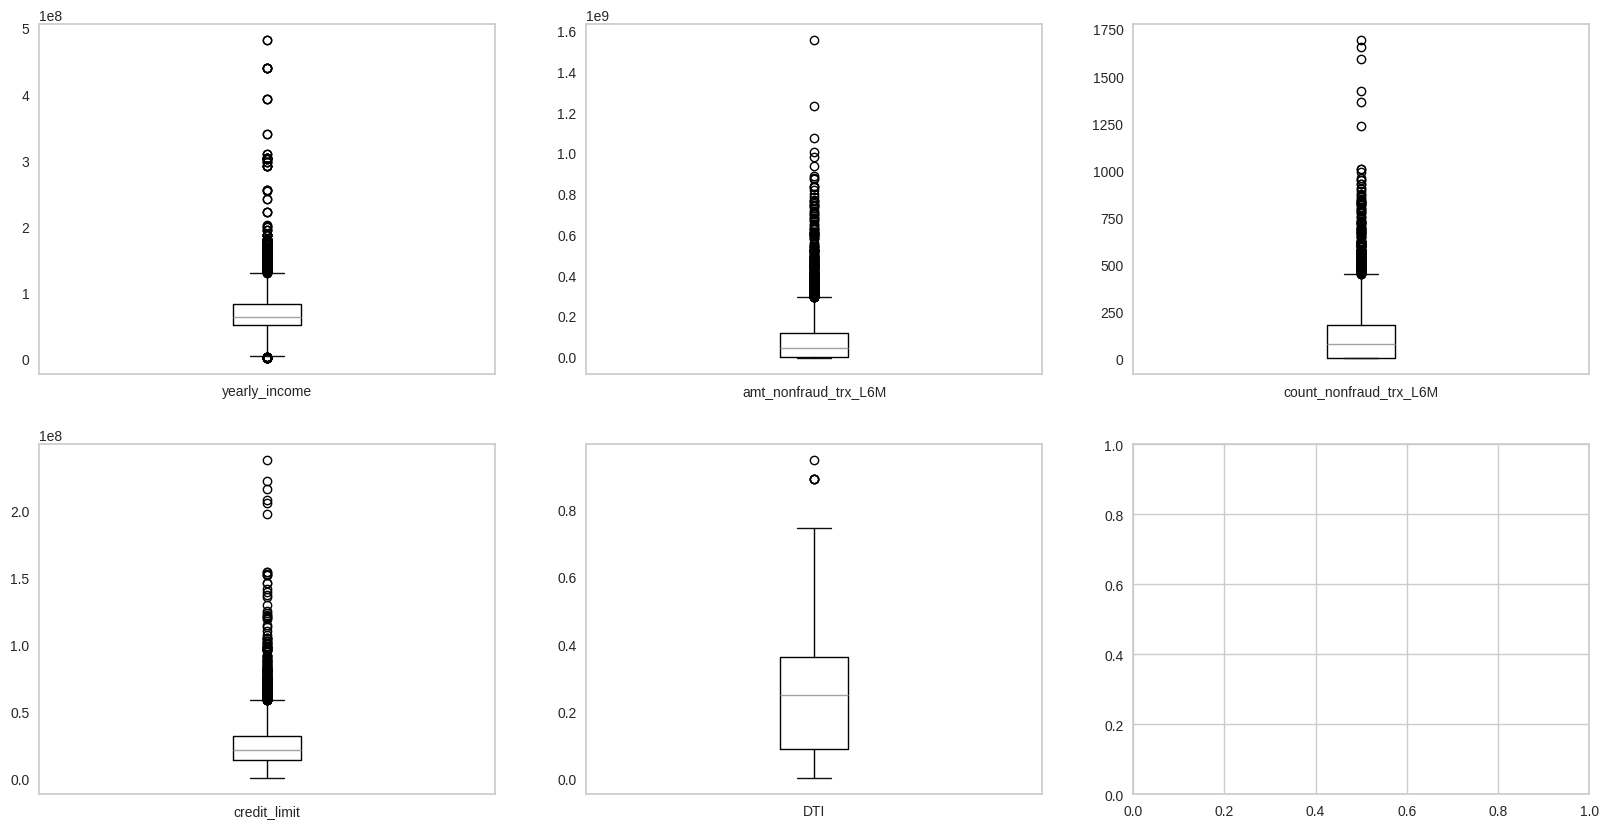

In [ ]:
# filter numeric column
feature = ['yearly_income', 'amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M', 'credit_limit', 'DTI']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_segmentation.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

**insight:** Boxplot analysis indicates that yearly income, transaction amount, transaction frequency, and credit limit are highly right-skewed with substantial extreme outliers, reflecting heterogeneous customer behavior and scale disparity across features. In contrast, DTI exhibits a more compact distribution with fewer extreme values, suggesting relatively stable risk characteristics. These distributional patterns necessitate the use of robust scaling to mitigate outlier influence and ensure balanced feature contribution in K-Means clustering.

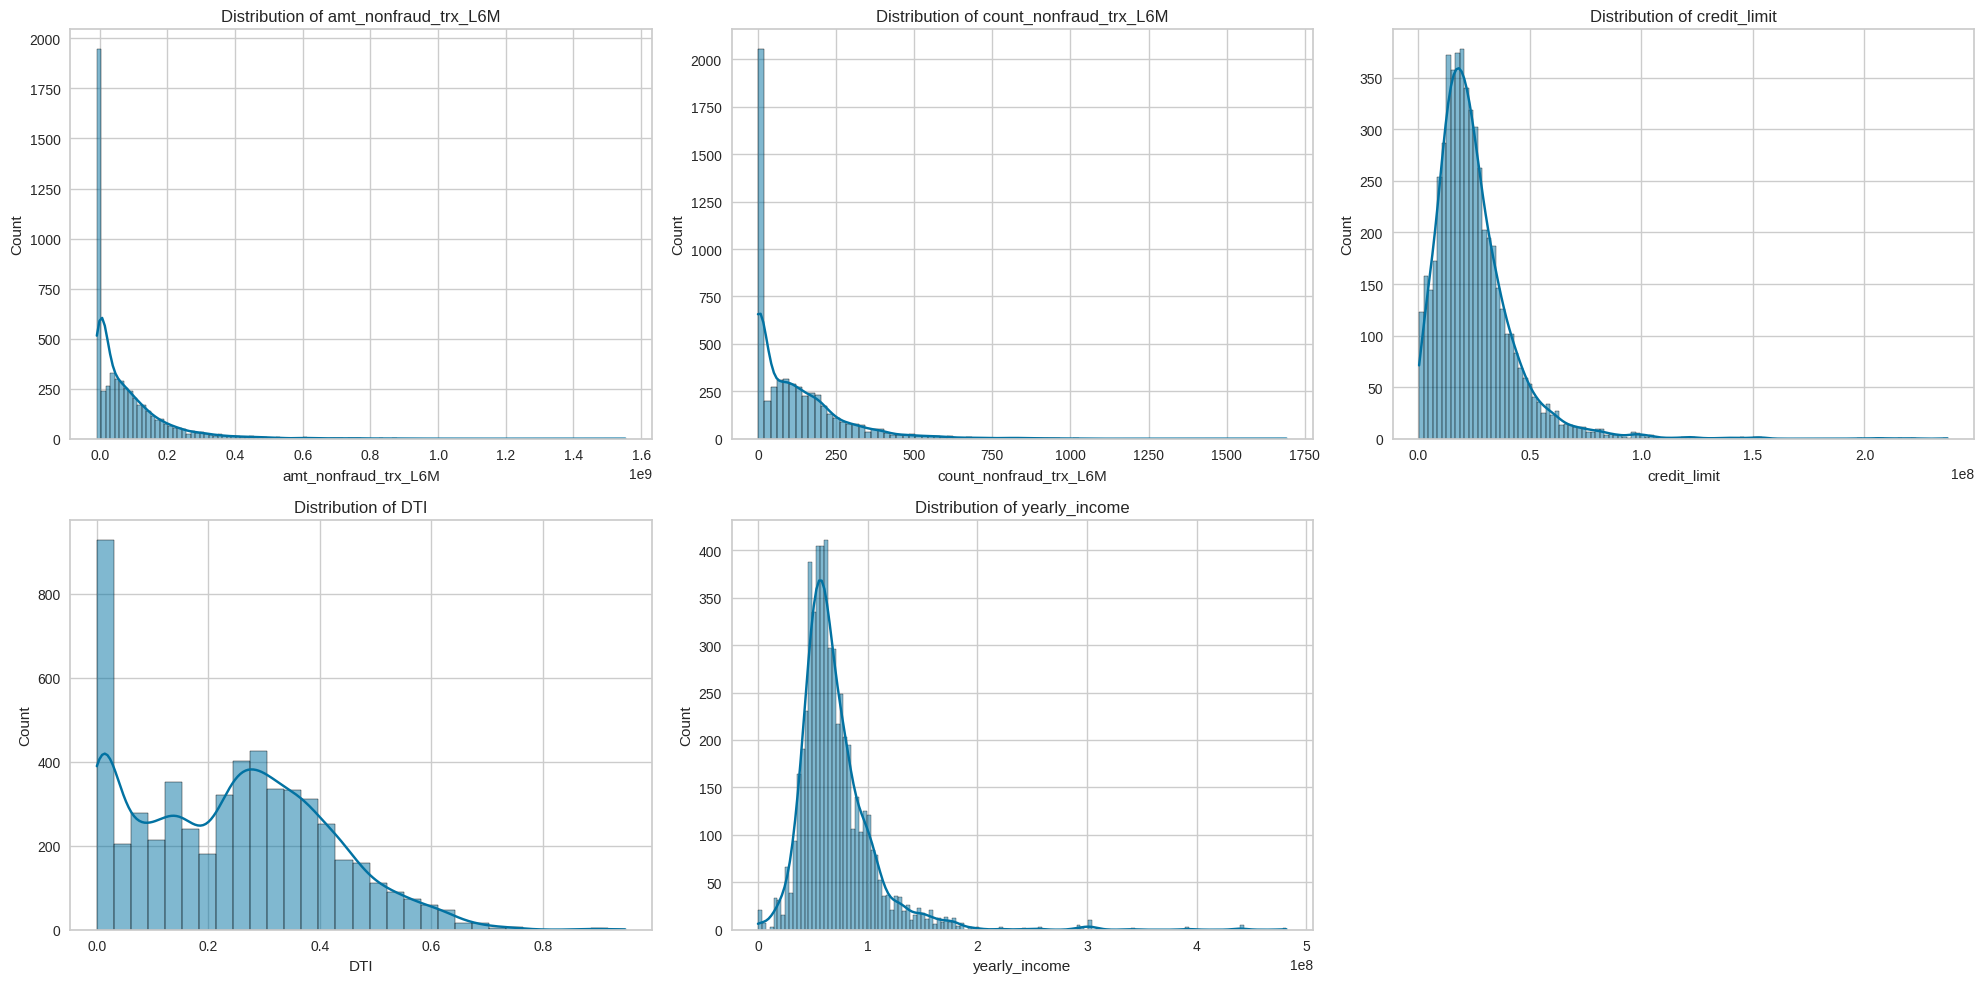

In [ ]:
# Checking Data Distribution

# Plot the distribution of annual_inc and loan_amnt
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
sns.histplot(df_segmentation['amt_nonfraud_trx_L6M'], kde=True)
plt.title('Distribution of amt_nonfraud_trx_L6M')

plt.subplot(2, 3, 2)
sns.histplot(df_segmentation['count_nonfraud_trx_L6M'], kde=True)
plt.title('Distribution of count_nonfraud_trx_L6M')

plt.subplot(2, 3, 3)
sns.histplot(df_segmentation['credit_limit'], kde=True)
plt.title('Distribution of credit_limit')

plt.subplot(2, 3, 4)
sns.histplot(df_segmentation['DTI'], kde=True)
plt.title('Distribution of DTI')

plt.subplot(2, 3, 5)
sns.histplot(df_segmentation['yearly_income'], kde=True)
plt.title('Distribution of yearly_income')

plt.tight_layout()
plt.show()


**The distribution analysis shows** that most financial and transactional variables are heavily right-skewed with long tails, particularly transaction amount, transaction frequency, credit limit, and yearly income, indicating the presence of extreme outliers and highly heterogeneous customer behavior. In contrast, DTI exhibits a more concentrated distribution with relatively lower dispersion, suggesting more stable risk characteristics across customers. These patterns justify the use of robust scaling to reduce the influence of extreme values while preserving meaningful behavioral differences for clustering.


### Preparing The Data

In [ ]:
df_segmentation_feature = df_segmentation[['id_x','yearly_income', 'amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M', 'credit_limit', 'DTI']]
df_segmentation_feature

,id_x,yearly_income,amt_nonfraud_trx_L6M,count_nonfraud_trx_L6M,credit_limit,DTI
0,0,113768000.0,177057300.0,181,53189000.0,0.116416
1,1,47459000.0,135687100.0,148,18200000.0,0.225225
2,2,57119000.0,186723300.0,415,31298000.0,0.166463
3,3,26761000.0,207881500.0,148,25732000.0,0.325114
4,4,61666000.0,28007500.0,48,30500000.0,0.114617
...,...,...,...,...,...,...
5523,6141,157375000.0,0.0,0,57378000.0,0.102393
5524,6142,39606000.0,0.0,0,19178000.0,0.135867
5525,6143,69439000.0,0.0,0,38739000.0,0.475953
5526,6144,47633000.0,0.0,0,10355000.0,0.103850


**Insight:** The prepared dataset captures wide variation in income, usage, and credit exposure, enabling effective behavioral and risk-based customer segmentation.

### Choosing Scaler

**Why RobustScaler?**

1. Uses median and IQR, making it robust to outliers

2. Preserves extreme but valid financial behaviors

3. Well-suited for financial data, customer segmentation, and identifying high-value or anomalous customers

#### RobustScaler


In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_segmentation_feature.copy()
column = ['yearly_income', 'amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M', 'credit_limit', 'DTI']

# using RobustScaler Scalera
rs_scaler = RobustScaler()
rs_scale_df[['yearly_income', 'amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M', 'credit_limit', 'DTI']] = rs_scaler.fit_transform(rs_scale_df[['yearly_income', 'amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M', 'credit_limit', 'DTI']])

<Axes: xlabel='amt_nonfraud_trx_L6M', ylabel='count_nonfraud_trx_L6M'>

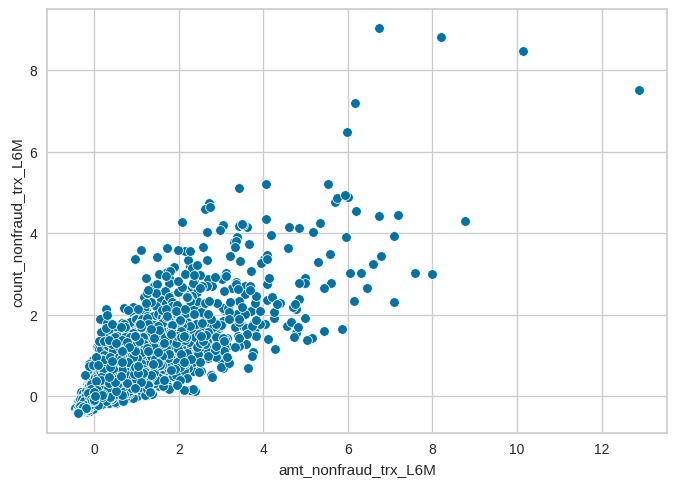

In [ ]:
# Transaction Value vs Frequency
sns.scatterplot(data=rs_scale_df, x='amt_nonfraud_trx_L6M', y='count_nonfraud_trx_L6M')



<Axes: xlabel='credit_limit', ylabel='DTI'>

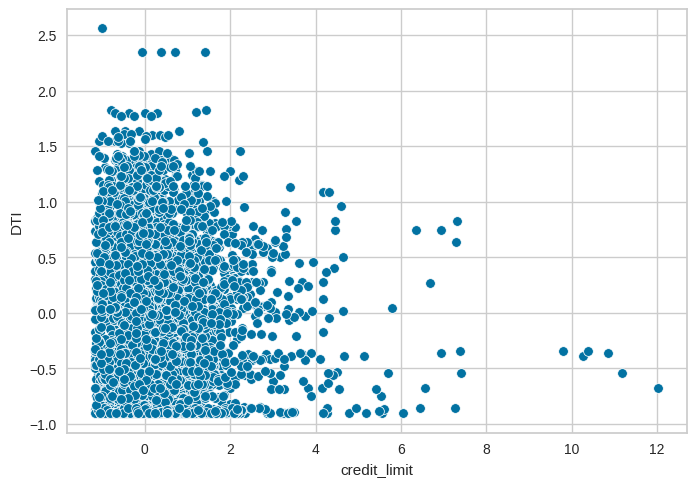

In [ ]:
# Credit Limit vs DTI
sns.scatterplot(data=rs_scale_df, x='credit_limit', y='DTI')


<Axes: xlabel='yearly_income', ylabel='amt_nonfraud_trx_L6M'>

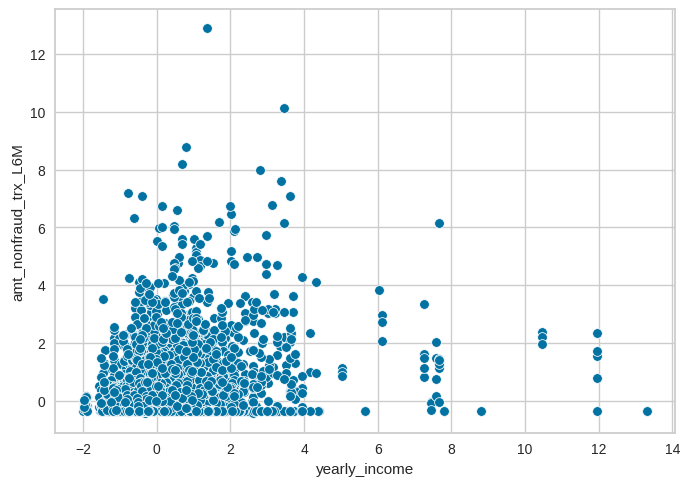

In [ ]:
#Yearly Income vs Transaction Amount
sns.scatterplot(
    data=rs_scale_df,
    x='yearly_income',
    y='amt_nonfraud_trx_L6M'
)

**Insight** These robust-scaled patterns provide a suitable foundation for K-Means clustering, as the algorithm captures customer segmentation primarily based on transaction behavior and credit exposure features that show clear relative separation while minimizing the dominance of income related outliers, resulting in more stable and interpretable clusters.

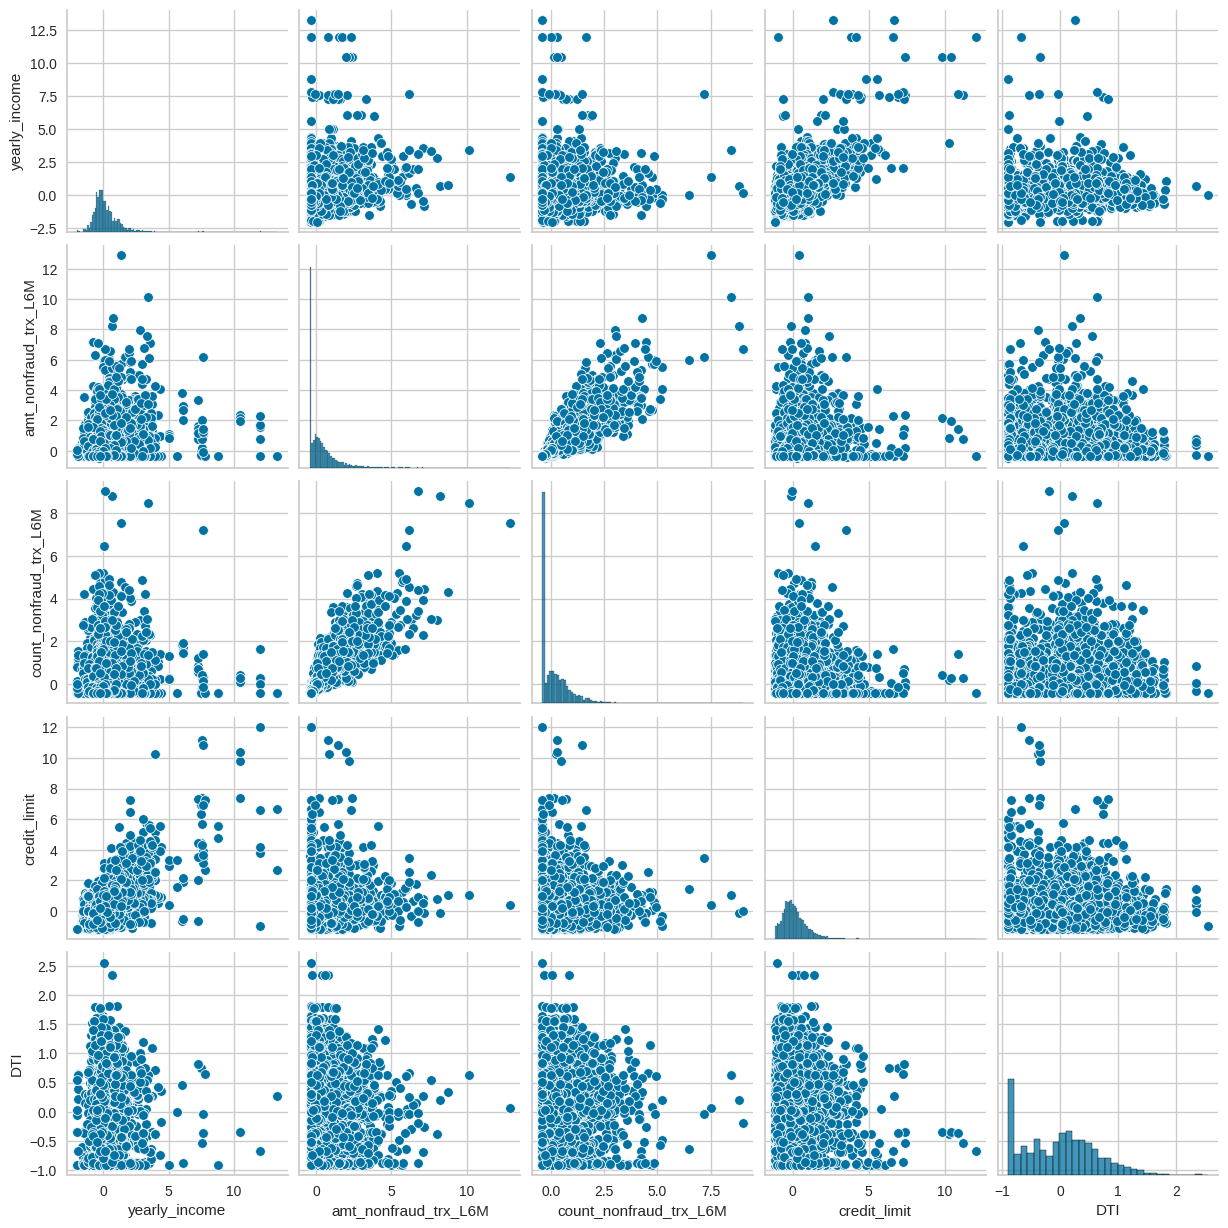

In [ ]:
sns.pairplot(rs_scale_df)

In [ ]:
rs_scale_df.describe()

,yearly_income,amt_nonfraud_trx_L6M,count_nonfraud_trx_L6M,credit_limit,DTI
count,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000
mean,0.252024,0.332044,0.232684,0.203159,-0.030096
std,1.154599,1.009968,0.843071,1.017919,0.621908
min,-2.003734,-0.443916,-0.424581,-1.172647,-0.907106
25%,-0.392471,-0.371700,-0.424581,-0.419794,-0.583892
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.607529,0.628300,0.575419,0.580206,0.416108
max,13.302311,12.881851,9.022346,12.036455,2.560426


**Insight**


1. Median values of 0 across all features confirm correct median-based scaling.

2. Reduced standard deviations relative to raw data indicate stabilized feature dispersion.

3. DTI exhibits a narrower spread compared to monetary variables, reflecting more consistent risk behavior.

### **Determining Number of Clusters**
We will determine the number of clusters and try different n_clusters and confirm using 2 tools:

Elbow Method and Silhouette Analysis

#### Elbow Method

The Elbow Method is used to identify the appropriate number of clusters by analyzing the point at which the reduction in within-cluster variance begins to diminish

In [ ]:
# Create empty list to store the inertia value for each K later
inertia = []

# Why not start from 1? Karena tidak perlu membentuk dan mengukur 1 cluster saja
K_range = range(1,11)

for K in K_range:
  # Create the model
  kmeanModel = KMeans(n_clusters=K, random_state=42, n_init='auto')
  # Train them using "rs_scale_df" data (our final data scaled by standard scaler)
  kmeanModel.fit(rs_scale_df)
  # Get the inertia value and put it in our empty list "inertia"
  inertia.append(kmeanModel.inertia_)

# Print output
inertia

[17356046264.604485,
 4381084035.196746,
 1934481588.7888815,
 1091819789.1148448,
 699083565.1125917,
 485615098.36645544,
 354855871.87890816,
 274371418.4882395,
 215359684.86018246,
 173235675.3899226]

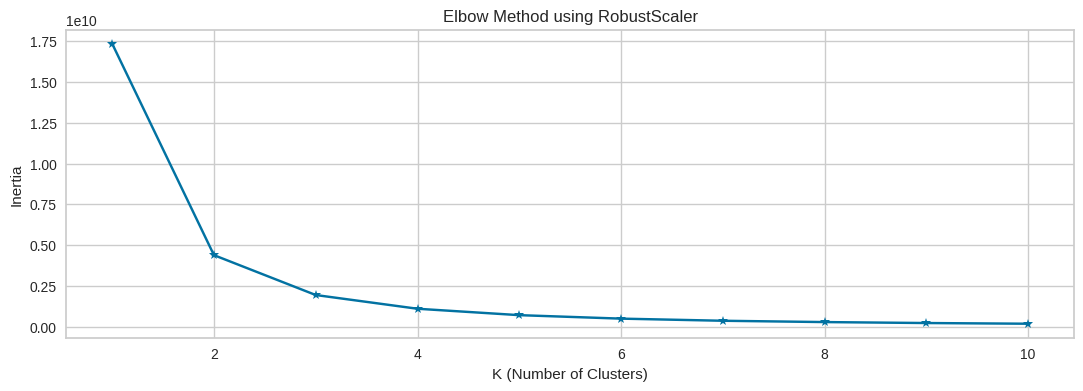

[17356046264.604485, 4381084035.196746, 1934481588.7888815, 1091819789.1148448, 699083565.1125917, 485615098.36645544, 354855871.87890816, 274371418.4882395, 215359684.86018246, 173235675.3899226]


In [ ]:
plt.figure(figsize=(13,4))
plt.plot(K_range, inertia, 'b*-')

plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method using RobustScaler')
plt.show()
print(inertia)

**Insight**The Elbow Method indicates that the optimal number of clusters is three (k = 3), as the reduction in inertia becomes marginal beyond this point, suggesting diminishing returns from adding more clusters.

#### **Silhouette Method (SilhouetteVisualizer)**

The Silhouette Method is used to evaluate the quality of the resulting clusters by measuring how well each data point fits within its assigned cluster compared to other clusters, ensuring clear separation and strong cohesion.

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4,5,6]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.42779909649830644
For n_clusters = 3 The average silhouette_score is : 0.3999856158852019
For n_clusters = 4 The average silhouette_score is : 0.31938953072428755
For n_clusters = 5 The average silhouette_score is : 0.22653974723898448


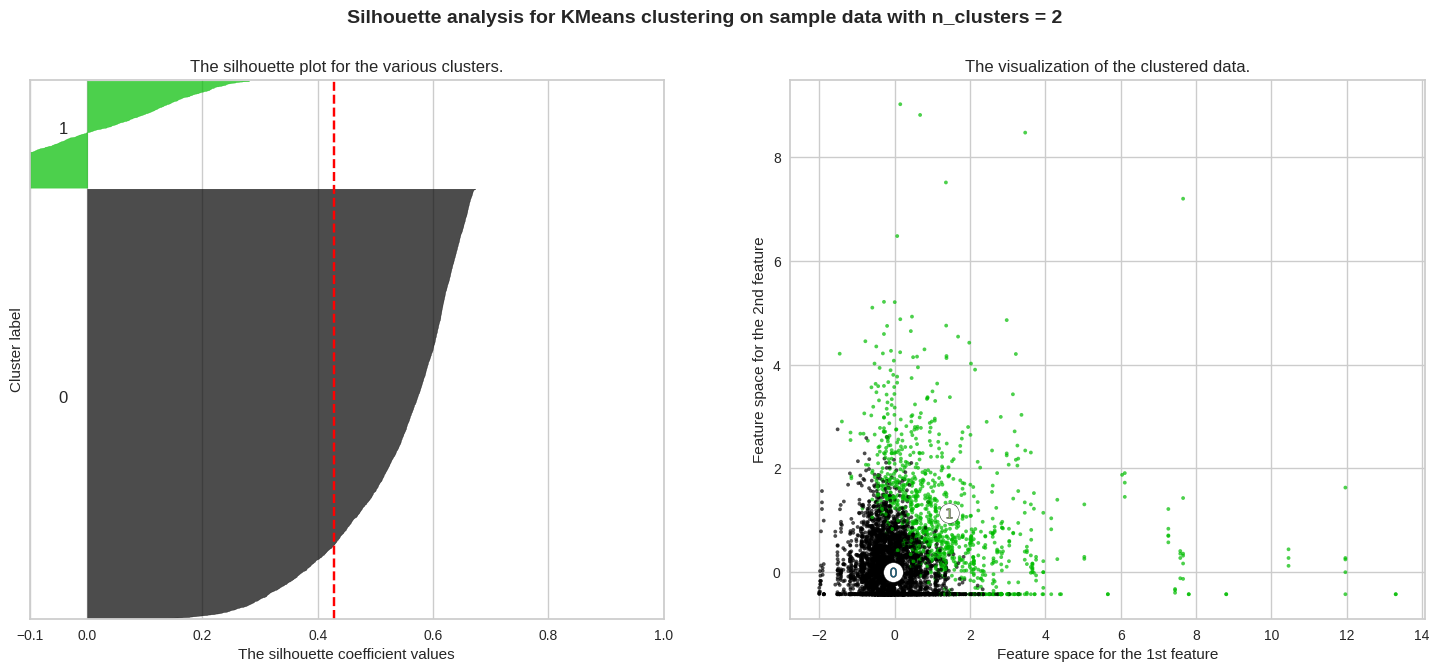

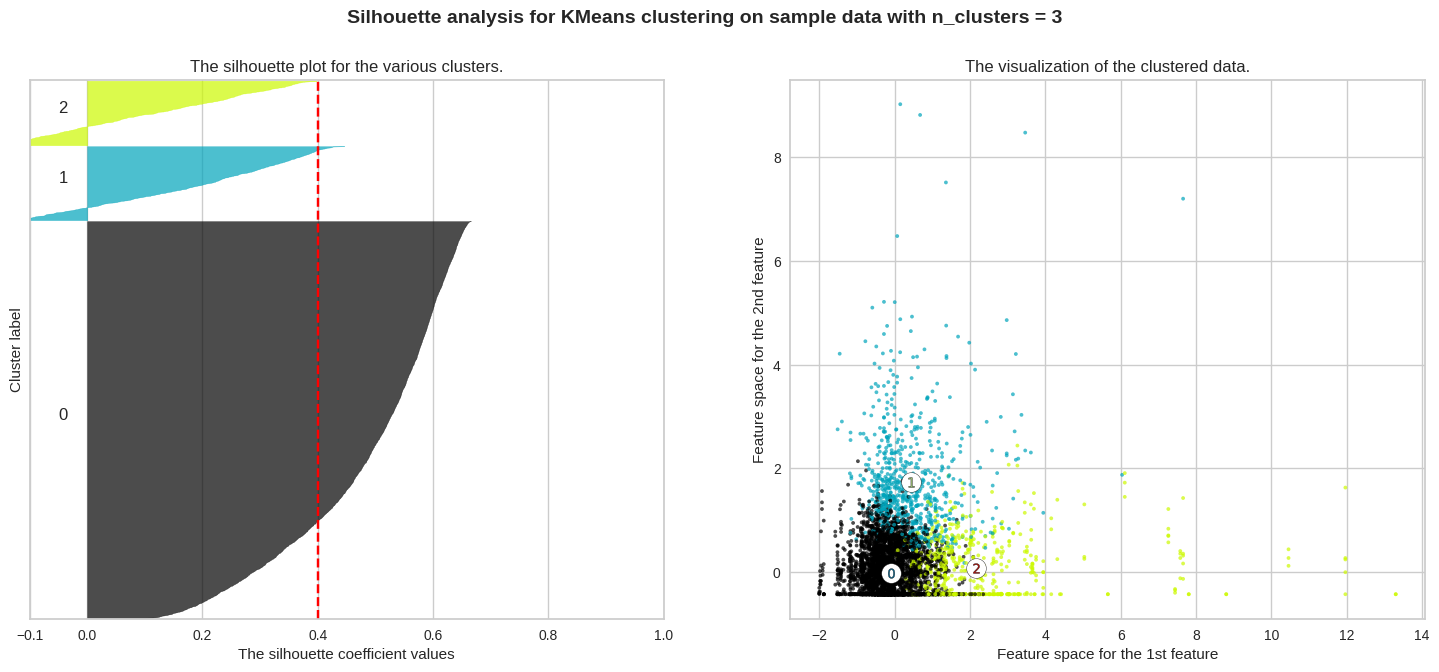

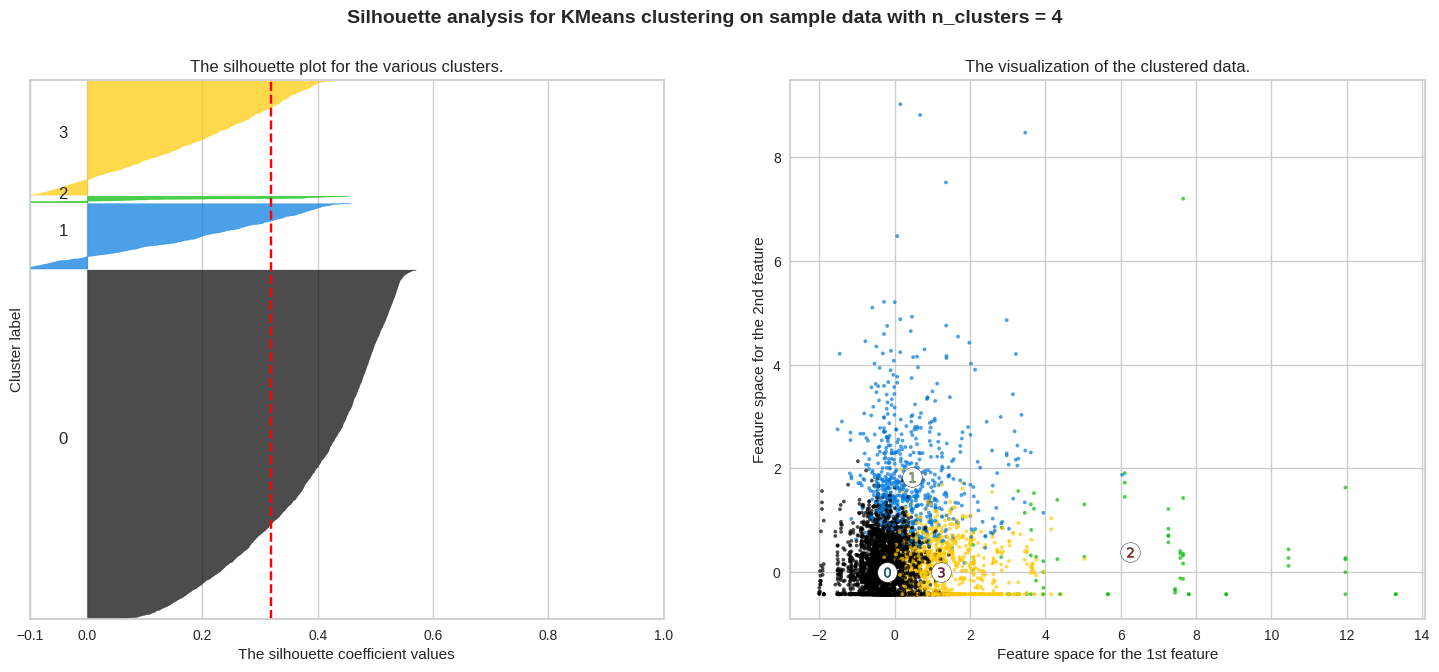

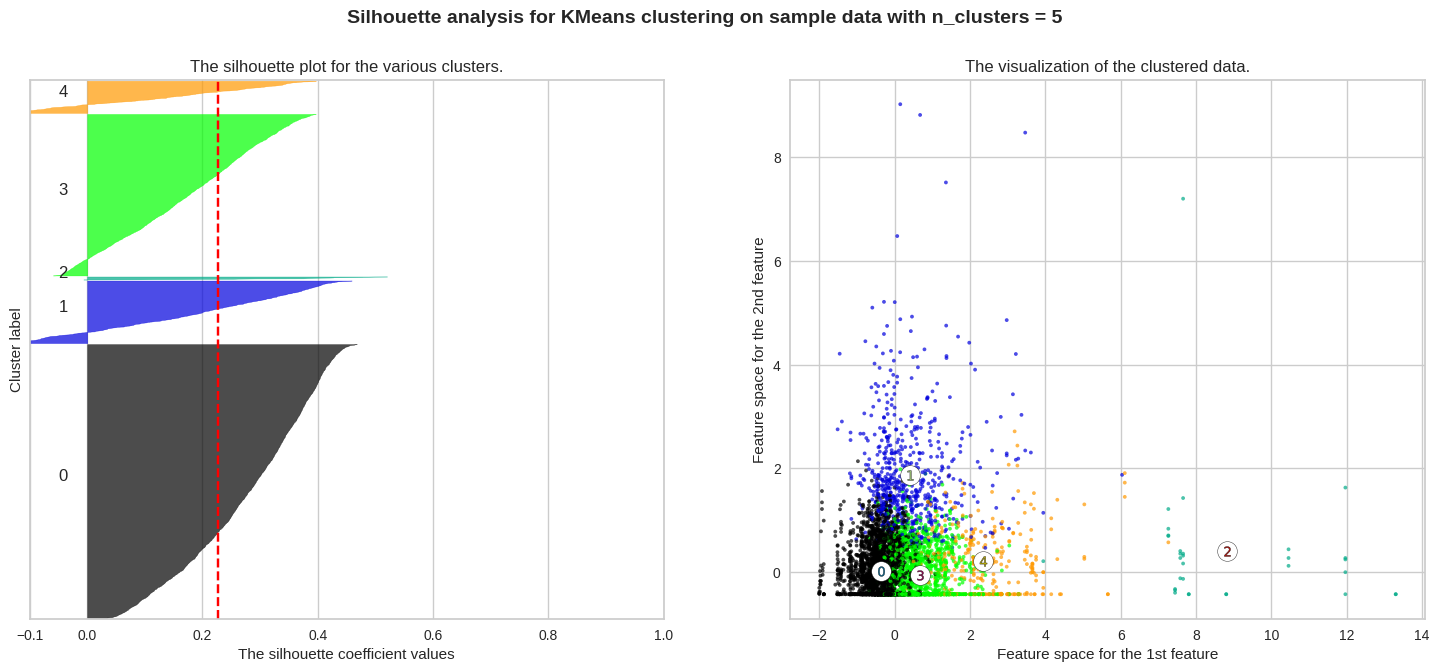

In [ ]:
silhoutte_analysis(rs_scale_df[['yearly_income', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'credit_limit', 'DTI']],list(range(2,6)))

Silhouette analysis shows that k = 3 yields the most distinct and stable clusters, while higher k values lead to increased overlap and over-segmentation.

#### **Conclusion:**
K= 3 select for the final model due to stronger cluster separation, higher stability, and better interpretability.

###Segmentation

In [ ]:
df_model = rs_scale_df.copy()
cluster_model = KMeans(n_clusters=3, random_state=100, n_init='auto')
cluster_model.fit(df_model[['yearly_income', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'credit_limit', 'DTI']])
df_model['cluster'] = cluster_model.labels_
df_model.head()

,id_x,yearly_income,amt_nonfraud_trx_L6M,count_nonfraud_trx_L6M,credit_limit,DTI,cluster
0,0,1.611096,1.139291,0.586592,1.775443,-0.481432,2
1,1,-0.495842,0.786242,0.402235,-0.174919,-0.083571,0
2,2,-0.188900,1.221780,1.893855,0.555192,-0.298435,1
3,3,-1.153511,1.402342,0.402235,0.244931,0.281674,0
4,4,-0.044421,-0.132687,-0.156425,0.510709,-0.488007,0


<Axes: xlabel='cluster', ylabel='count_nonfraud_trx_L6M'>

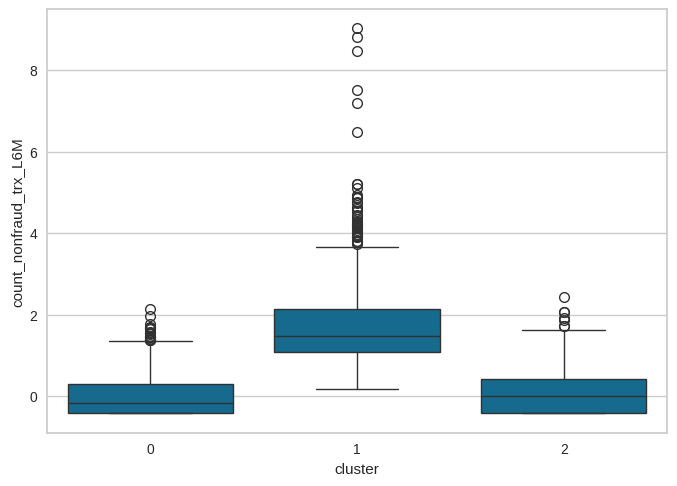

In [ ]:
#Transaction Frequency
sns.boxplot (data = df_model , x ='cluster' , y ='count_nonfraud_trx_L6M')

**Transaction Frequency (count_nonfraud_trx_L6M)**

Cluster 1 shows the highest median and widest spread, with numerous upper outliers, indicating significantly higher transaction activity.

Clusters 0 and 2 have medians around or below the population median, reflecting lower transaction frequency.

Insight: Transaction frequency is a key differentiator separating highly active users from the rest.

<Axes: xlabel='cluster', ylabel='amt_nonfraud_trx_L6M'>

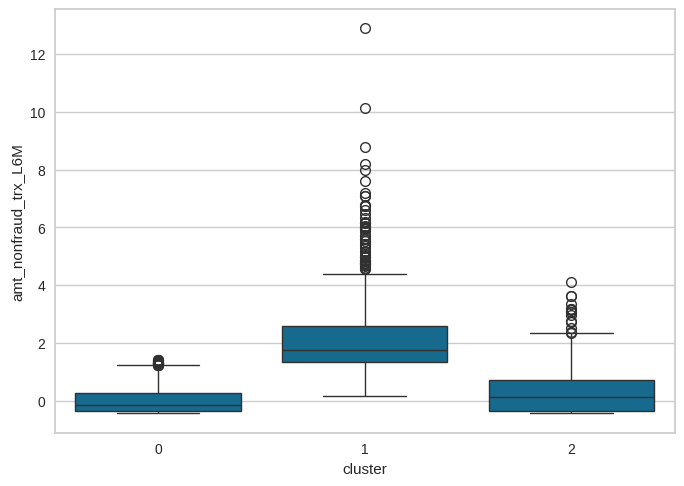

In [ ]:
#Transaction amount
sns.boxplot (data = df_model , x ='cluster' , y ='amt_nonfraud_trx_L6M')

**Transaction Value (amt_nonfraud_trx_L6M)**

1. Cluster 1 exhibits the highest median transaction value and the largest dispersion, confirming its role as the primary revenue-generating segment.

2. Cluster 2 is slightly above the population median but remains well below Cluster 1.

3. Cluster 0 is concentrated around lower values with limited variability.

**Insight:** Transaction value strongly distinguishes high-value customers from moderate and low-usage segments.

<Axes: xlabel='cluster', ylabel='credit_limit'>

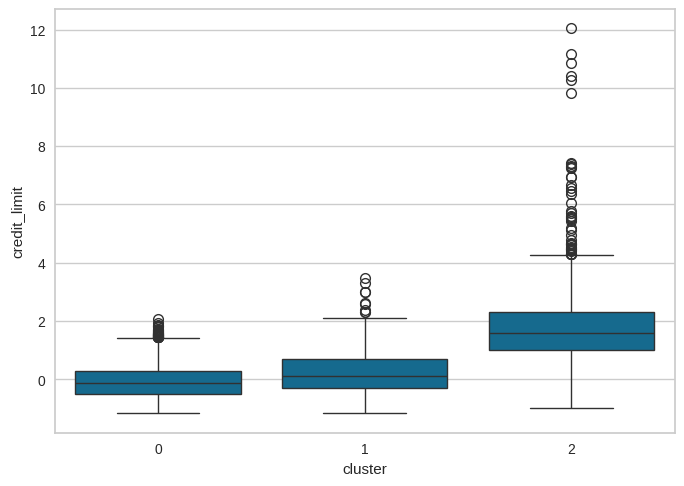

In [ ]:
#Credit Limit
sns.boxplot (data = df_model , x ='cluster' , y ='credit_limit')

**Credit Limit**

1. Cluster 2 has the highest median credit limit and numerous extreme outliers, representing customers with substantial credit capacity.

2. Cluster 1 maintains credit limits slightly above the median.

3. Cluster 0 shows lower and more compact credit limit distributions.

**Insight:** Credit limit primarily differentiates financially capable customers from behavior-driven high-activity users.

<Axes: xlabel='cluster', ylabel='DTI'>

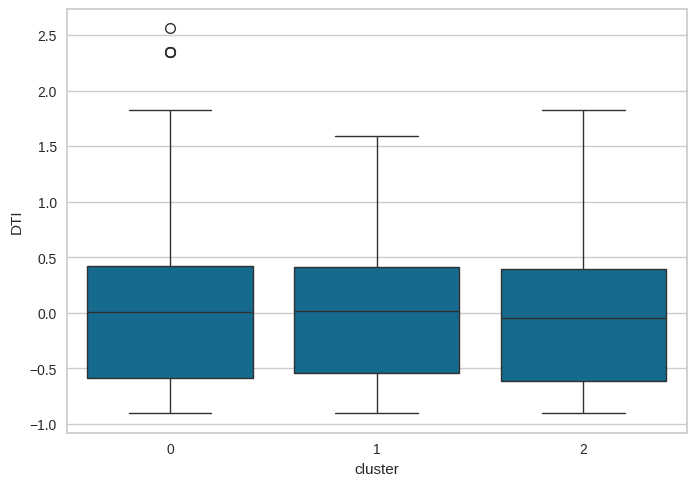

In [ ]:
#DTI
sns.boxplot (data = df_model , x ='cluster' , y ='DTI')

**DTI**

1. DTI distributions are relatively similar across all clusters, with comparable medians and spreads.

2. No strong separation is observed based on DTI alone.

**Insight:** DTI acts as a risk control variable rather than a primary clustering driver.

<Axes: xlabel='cluster', ylabel='yearly_income'>

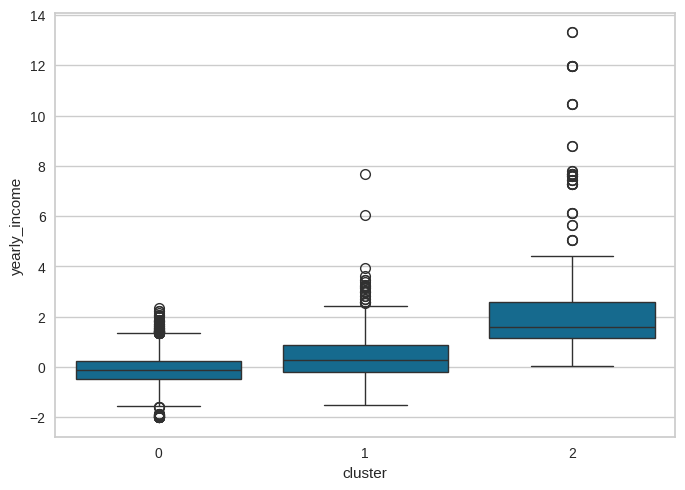

In [ ]:
#yearly_income
sns.boxplot (data = df_model , x ='cluster' , y ='yearly_income')

**Yearly Income**

1. Cluster 2 displays the highest median income and widest dispersion, with many positive outliers.

2. Cluster 1 sits moderately above the population median.

3. Cluster 0 has the lowest income levels overall.

**Insight:** Income differentiates financial capacity but does not directly translate into higher transaction activity.

**CONCLUSION** The boxplot analysis confirms that K-Means clustering primarily separates customers based on transaction behavior and credit exposure, while income reflects financial capacity and DTI remains relatively stable across segments—supporting a balanced profitability-and-risk segmentation framework.

In [ ]:
cluster_profile = df_model.groupby('cluster',as_index = False)[['yearly_income','count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'credit_limit', 'DTI']].mean()
cluster_profile

,cluster,yearly_income,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,credit_limit,DTI
0,0,-0.095527,-0.021987,-0.005400,-0.087070,-0.021763
1,1,0.433919,1.758410,2.193998,0.238689,-0.020214
2,2,2.131251,0.078841,0.303729,1.900377,-0.090807


**Insight** The clustering results distinguish customers primarily by transaction intensity and credit exposure, separating active revenue drivers from underutilized high-capacity and average users.

### Merge Dataset

In [ ]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_x                    5528 non-null   string        
 1   client_id               5528 non-null   object        
 2   card_brand              5528 non-null   string        
 3   card_number             5528 non-null   Int64         
 4   expires                 5528 non-null   datetime64[ns]
 5   cvv                     5528 non-null   int64         
 6   credit_limit            5528 non-null   float64       
 7   acct_open_date          5528 non-null   datetime64[ns]
 8   year_pin_last_changed   5528 non-null   int64         
 9   days_since_last_trx     5528 non-null   int64         
 10  count_nonfraud_trx_L6M  5528 non-null   Int64         
 11  amt_nonfraud_trx_L6M    5528 non-null   float64       
 12  count_fraud_trx_L6M     5528 non-null   Int64   

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_x                    5528 non-null   string 
 1   yearly_income           5528 non-null   float64
 2   amt_nonfraud_trx_L6M    5528 non-null   float64
 3   count_nonfraud_trx_L6M  5528 non-null   float64
 4   credit_limit            5528 non-null   float64
 5   DTI                     5528 non-null   float64
 6   cluster                 5528 non-null   int32  
dtypes: float64(5), int32(1), string(1)
memory usage: 280.8 KB


In [ ]:
df_segmented = df_model.merge(df_segmentation, on='id_x', how='inner')
df_segmented

,id_x,yearly_income_x,amt_nonfraud_trx_L6M_x,count_nonfraud_trx_L6M_x,credit_limit_x,DTI_x,cluster,client_id,card_brand,card_number,...,retirement_age,birthdate,gender,per_capita_income,yearly_income_y,total_debt,credit_score,age,retired_flag,DTI_y
0,0,1.611096,1.139291,0.586592,1.775443,-0.481432,2,1362,AMEX,393314135668401,...,67,1968-01-24,Male,55798000.0,113768000.0,13244380.0,727,57,non retired,0.116416
1,1,-0.495842,0.786242,0.402235,-0.174919,-0.083571,0,550,MASTERCARD,5278231764792292,...,70,1950-02-25,Male,33293000.0,47459000.0,10688952.0,763,75,retired,0.225225
2,2,-0.188900,1.221780,1.893855,0.555192,-0.298435,1,556,MASTERCARD,5889825928297675,...,66,1979-12-12,Male,28016000.0,57119000.0,9508190.0,715,45,non retired,0.166463
3,3,-1.153511,1.402342,0.402235,0.244931,0.281674,0,1937,VISA,4289888672554714,...,62,1961-02-12,Female,39774000.0,26761000.0,8700380.0,667,64,retired,0.325114
4,4,-0.044421,-0.132687,-0.156425,0.510709,-0.488007,0,1981,MASTERCARD,5433366978583845,...,65,1978-01-24,Male,30241000.0,61666000.0,7068000.0,702,47,non retired,0.114617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,6141,2.996688,-0.371700,-0.424581,2.008947,-0.532706,2,715,MASTERCARD,5369522792349411,...,75,1989-01-07,Female,77187000.0,157375000.0,16114095.0,821,36,non retired,0.102393
5524,6142,-0.745367,-0.371700,-0.424581,-0.120403,-0.410309,0,1236,MASTERCARD,5791756986936871,...,65,1953-09-06,Female,22978000.0,39606000.0,5381142.0,730,71,retired,0.135867
5525,6143,0.202563,-0.371700,-0.424581,0.969969,0.833217,0,253,MASTERCARD,5482273460029161,...,62,1965-01-15,Male,34055000.0,69439000.0,33049714.0,664,60,non retired,0.475953
5526,6144,-0.490313,-0.371700,-0.424581,-0.612216,-0.527380,0,737,MASTERCARD,5413710543564908,...,60,1964-03-28,Female,29750000.0,47633000.0,4946666.0,758,61,retired,0.103850


In [ ]:
df_segmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_x                      5528 non-null   string        
 1   yearly_income_x           5528 non-null   float64       
 2   amt_nonfraud_trx_L6M_x    5528 non-null   float64       
 3   count_nonfraud_trx_L6M_x  5528 non-null   float64       
 4   credit_limit_x            5528 non-null   float64       
 5   DTI_x                     5528 non-null   float64       
 6   cluster                   5528 non-null   int32         
 7   client_id                 5528 non-null   object        
 8   card_brand                5528 non-null   string        
 9   card_number               5528 non-null   Int64         
 10  expires                   5528 non-null   datetime64[ns]
 11  cvv                       5528 non-null   int64         
 12  credit_limit_y      

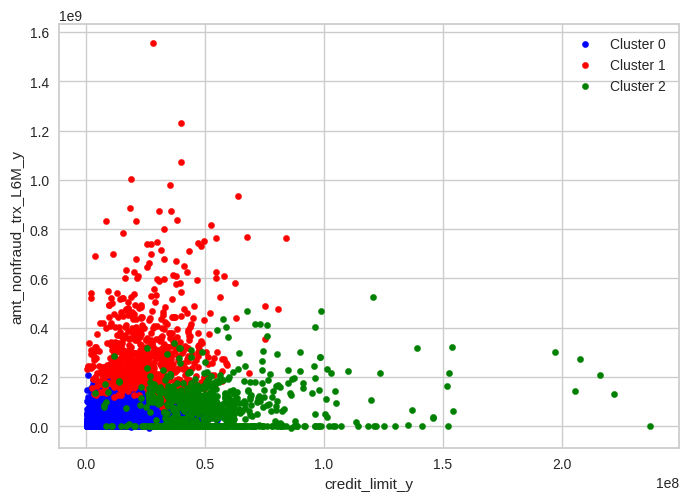

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(
    x='credit_limit_y',
    y='amt_nonfraud_trx_L6M_y',
    c='blue',
    label='Cluster 0'
)

cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(
    x='credit_limit_y',
    y='amt_nonfraud_trx_L6M_y',
    c='red',
    label='Cluster 1',
    ax=cluster_scatter
)

cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(
    x='credit_limit_y',
    y='amt_nonfraud_trx_L6M_y',
    c='green',
    label='Cluster 2',
    ax=cluster_scatter
)



### Descriptive Statistic

In [ ]:
df_model.groupby('cluster',as_index = False)[['yearly_income', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'credit_limit', 'DTI']].agg(['count','mean','min','max','median']).T

0           1           2
cluster                           0.000000    1.000000    2.000000
yearly_income          count   4092.000000  752.000000  684.000000
                       mean      -0.095527    0.433919    2.131251
                       min       -2.003734   -1.516948    0.038066
                       max        2.349281    7.656581   13.302311
                       median    -0.131515    0.280521    1.573220
count_nonfraud_trx_L6M count   4092.000000  752.000000  684.000000
                       mean      -0.021987    1.758410    0.078841
                       min       -0.424581    0.178771   -0.424581
                       max        2.139665    9.022346    2.441341
                       median    -0.162011    1.486034    0.000000
amt_nonfraud_trx_L6M   count   4092.000000  752.000000  684.000000
                       mean      -0.005400    2.193998    0.303729
                       min       -0.443916    0.150222   -0.412082
                       max        1.423821   12.881851    4.102907
                       median    -0.146639    1.765448    0.141251
credit_limit           count   4092.000000  752.000000  684.000000
                       mean      -0.087070    0.238689    1.900377
                       min       -1.172647   -1.168132   -0.970805
                       max        2.063351    3.486671   12.036455
                       median    -0.131691    0.113714    1.588372
DTI                    count   4092.000000  752.000000  684.000000
                       mean      -0.021763   -0.020214   -0.090807
                       min       -0.907106   -0.907106   -0.907106
                       max        2.560426    1.592606    1.822106
                       median     0.006274    0.018159   -0.048350

### **Business Opportunities by Customer Segment**

**Cluster 0 – Moderate Usage Cluster**
Encourage higher engagement through targeted promotions and usage-based incentives.
Maintain current credit exposure while monitoring behavioral changes.
Focus on retention programs to gradually increase transaction frequency.

**Cluster 1 – High-Value Active Cluster**
Prioritize loyalty and rewards programs to sustain high transaction intensity.
Offer selective credit limit increases to unlock additional spending potential.
Cross-sell premium products and value-added services to maximize lifetime value.

**Cluster 2 – Affluent but Underutilized Cluster**
Activate spending through personalized offers and tailored merchant campaigns.
Reassess credit utilization strategy to improve card usage efficiency.
Introduce lifestyle-based rewards and premium features to convert capacity into revenue.


###**Recommendation**

1. Prioritize Cluster 1 (High-Value Active Users) for premium offers, enhanced loyalty rewards, and selective credit limit increases to maximize transaction frequency, transaction value, and MDR-based revenue.

2. Deploy activation-focused campaigns for Cluster 2 (Affluent but Underutilized Users) through personalized merchant promotions, lifestyle-based rewards, and targeted engagement programs to convert high income and credit capacity into higher card usage.

3. Maintain cost-efficient retention strategies for Cluster 0 (Moderate Usage Users) using light incentives and behavioral nudges to gradually uplift transaction activity while preserving a balanced risk profile.